
Load and prepare Data

First we need to update the notebook to the latest version of fastai.


In [1]:
!pip install -Uqq fastai 
from fastai.vision.all import *#Use Pandas to parse the JSON as a human readable table

     |████████████████████████████████| 197 kB 4.9 MB/s 
     |████████████████████████████████| 59 kB 4.5 MB/s 


At first we are downloading the Food Dataset, containing about 100k images of various kind of foods. Documentation for all Datasets: https://docs.fast.ai/data.external

In [2]:
foodPath = untar_data(URLs.FOOD)

In [3]:
#How many images are we dealing with
len(get_image_files(foodPath))

101000

In [4]:
print(os.listdir(foodPath))

['images', 'test.json', 'labels.txt', 'test.txt', 'train.json', 'classes.txt', 'train.txt', 'h5']


In [5]:
image_dir_path = foodPath/'images'
image_categories = os.listdir(image_dir_path)
print(image_categories)

['frozen_yogurt', 'cheesecake', 'risotto', 'donuts', 'sashimi', 'spring_rolls', 'panna_cotta', 'ravioli', 'apple_pie', 'pork_chop', 'club_sandwich', 'peking_duck', 'gnocchi', 'fried_rice', 'chicken_wings', 'hot_and_sour_soup', 'edamame', 'samosa', 'ceviche', 'miso_soup', 'cheese_plate', 'caesar_salad', 'cup_cakes', 'baby_back_ribs', 'mussels', 'bruschetta', 'chicken_quesadilla', 'falafel', 'macaroni_and_cheese', 'poutine', 'spaghetti_bolognese', 'gyoza', 'paella', 'oysters', 'pizza', 'french_toast', 'chocolate_mousse', 'lobster_bisque', 'escargots', 'seaweed_salad', 'omelette', 'chicken_curry', 'pad_thai', 'hamburger', 'tacos', 'dumplings', 'red_velvet_cake', 'grilled_salmon', 'caprese_salad', 'tuna_tartare', 'lobster_roll_sandwich', 'hot_dog', 'fried_calamari', 'pho', 'breakfast_burrito', 'bread_pudding', 'foie_gras', 'beignets', 'carrot_cake', 'baklava', 'waffles', 'grilled_cheese_sandwich', 'crab_cakes', 'macarons', 'takoyaki', 'bibimbap', 'greek_salad', 'ice_cream', 'shrimp_and_gri

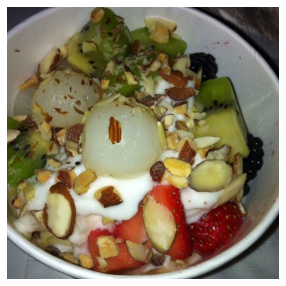

In [6]:
img = PILImage.create('/root/.fastai/data/food-101/images/frozen_yogurt/1942235.jpg')
img.show();

In [7]:
#Use Pandas to parse the JSON as a human readable table
df_test=pd.read_json('/root/.fastai/data/food-101/test.json')
df_test.head()

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1061830,hot_and_sour_soup/1000486,samosa/1009326,sashimi/100113,pork_chop/1012227,spring_rolls/1005480,panna_cotta/1006650,beef_tartare/101073,greek_salad/1010850,foie_gras/1007306,...,chicken_quesadilla/10257,pho/1002382,prime_rib/1006976,cheesecake/1023543,ice_cream/1004744,omelette/1019294,grilled_cheese_sandwich/1000938,lobster_roll_sandwich/1002698,nachos/1011831,oysters/1005672
1,churros/1064042,hot_and_sour_soup/1004564,samosa/1024186,sashimi/1017182,pork_chop/1019077,spring_rolls/103010,panna_cotta/1027460,beef_tartare/1029120,greek_salad/1029680,foie_gras/1044237,...,chicken_quesadilla/1030292,pho/1020153,prime_rib/102197,cheesecake/102854,ice_cream/1031536,omelette/1058816,grilled_cheese_sandwich/1003050,lobster_roll_sandwich/1029665,nachos/101954,oysters/1017801
2,churros/1074903,hot_and_sour_soup/1011278,samosa/1036216,sashimi/1043094,pork_chop/102958,spring_rolls/1036175,panna_cotta/1030883,beef_tartare/1030025,greek_salad/1053670,foie_gras/1073688,...,chicken_quesadilla/1052529,pho/1026354,prime_rib/102813,cheesecake/1073148,ice_cream/1075106,omelette/1116874,grilled_cheese_sandwich/1005927,lobster_roll_sandwich/103891,nachos/103312,oysters/1019666
3,churros/1085259,hot_and_sour_soup/1029400,samosa/103689,sashimi/1050391,pork_chop/1040432,spring_rolls/1044858,panna_cotta/103712,beef_tartare/1031053,greek_salad/1062715,foie_gras/1113614,...,chicken_quesadilla/1096804,pho/1028507,prime_rib/1035695,cheesecake/1092082,ice_cream/1100243,omelette/1122818,grilled_cheese_sandwich/100694,lobster_roll_sandwich/104300,nachos/1044020,oysters/1040557
4,churros/1097261,hot_and_sour_soup/1044215,samosa/1052427,sashimi/10551,pork_chop/1045605,spring_rolls/1067952,panna_cotta/1050629,beef_tartare/1066933,greek_salad/1101710,foie_gras/1125178,...,chicken_quesadilla/1102036,pho/1029709,prime_rib/105375,cheesecake/1096018,ice_cream/1106165,omelette/1145379,grilled_cheese_sandwich/1052563,lobster_roll_sandwich/1046809,nachos/1060157,oysters/1044823


In [8]:
#Use Pandas to parse the JSON as a human readable table
df_train=pd.read_json('/root/.fastai/data/food-101/train.json')
df_train.head()

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1004234,hot_and_sour_soup/1002782,samosa/1008131,sashimi/1001239,pork_chop/1000802,spring_rolls/1002160,panna_cotta/1001332,beef_tartare/1000431,greek_salad/1007149,foie_gras/1004944,...,chicken_quesadilla/1004279,pho/1005681,prime_rib/1001089,cheesecake/1001446,ice_cream/1012277,omelette/1001719,grilled_cheese_sandwich/1003153,lobster_roll_sandwich/100009,nachos/100284,oysters/1008124
1,churros/1013460,hot_and_sour_soup/1003688,samosa/1011601,sashimi/1001363,pork_chop/1006233,spring_rolls/1003056,panna_cotta/1003460,beef_tartare/1005746,greek_salad/1009138,foie_gras/1008577,...,chicken_quesadilla/1009225,pho/1011443,prime_rib/1006320,cheesecake/1004515,ice_cream/101858,omelette/1007843,grilled_cheese_sandwich/10060,lobster_roll_sandwich/1001432,nachos/1009513,oysters/1016229
2,churros/1016791,hot_and_sour_soup/1008185,samosa/101365,sashimi/1002556,pork_chop/1019530,spring_rolls/1003507,panna_cotta/1011097,beef_tartare/1009672,greek_salad/1010520,foie_gras/1011711,...,chicken_quesadilla/1011413,pho/1012513,prime_rib/100945,cheesecake/1004807,ice_cream/102595,omelette/1015300,grilled_cheese_sandwich/1007544,lobster_roll_sandwich/100646,nachos/1011394,oysters/1023832
3,churros/102100,hot_and_sour_soup/1008701,samosa/1015943,sashimi/1007253,pork_chop/1019569,spring_rolls/1008736,panna_cotta/1013000,beef_tartare/1012128,greek_salad/1011665,foie_gras/1017233,...,chicken_quesadilla/1023828,pho/1019401,prime_rib/10120,cheesecake/1017408,ice_cream/1044117,omelette/1029915,grilled_cheese_sandwich/1013343,lobster_roll_sandwich/100655,nachos/1013641,oysters/103236
4,churros/1025494,hot_and_sour_soup/1008924,samosa/1016296,sashimi/1010510,pork_chop/1025391,spring_rolls/1012525,panna_cotta/1020036,beef_tartare/1027680,greek_salad/1012989,foie_gras/1023512,...,chicken_quesadilla/1024740,pho/1021371,prime_rib/1016126,cheesecake/1021942,ice_cream/104465,omelette/1038109,grilled_cheese_sandwich/1016030,lobster_roll_sandwich/100702,nachos/1014846,oysters/1038150


In [9]:
#Deciding which two foods we want to classify
labelA = 'cheesecake'
labelB = 'donuts'
labelC= 'panna_cotta'

Some Data Preperation

Next we're gonna do some preperation to make the data handling easier. It's not important that you understand the following code snippet completly.

We're just doing two things:

    Removing all images that don't have labelA or labelB
    Renaming images with labelA or labelB to have that label in their filename

In [10]:
#Loop through all Images downloaded
for img in get_image_files(foodPath):    
  #Rename Images so that the Label (Samosa or Churros) is in the file name
  if labelA in str(img):
    img.rename(f"{img.parent}/{labelA}-{img.name}")
  elif labelB in str(img):
    img.rename(f"{img.parent}/{labelB}-{img.name}")
  elif labelC in str(img):
    img.rename(f"{img.parent}/{labelC}-{img.name}")
  else: os.remove(img) #If the Images are not part of labelA or labelB

len(get_image_files(foodPath))

3000


Train Model

In [11]:
def GetLabel(fileName):
  return fileName.split('-')[0]

GetLabel("cheesecake-1092082.jpg") #Testing

'cheesecake'

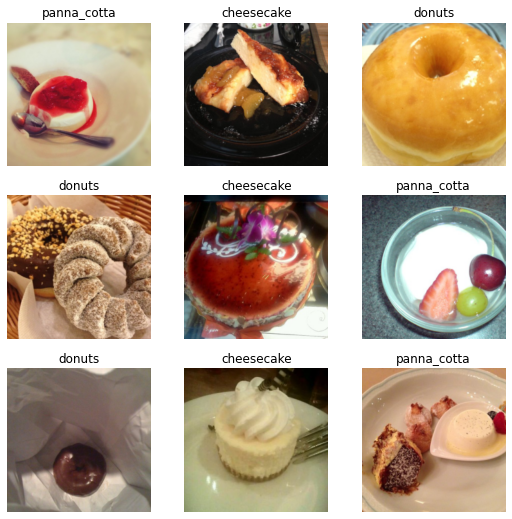

In [12]:
dls = ImageDataLoaders.from_name_func(
    foodPath, get_image_files(foodPath), valid_pct=0.2, seed=42,
    label_func=GetLabel, item_tfms=Resize(224))

dls.train.show_batch()

In [13]:
learn = vision_learner(dls, resnet34, metrics=accuracy, pretrained=True)
learn.fine_tune(epochs=10)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.013814,0.468380,0.835000,00:23


epoch,train_loss,valid_loss,accuracy,time
0,0.465423,0.359436,0.863333,00:23
1,0.300155,0.361954,0.871667,00:24
2,0.210390,0.442326,0.873333,00:23
3,0.129766,0.359594,0.903333,00:23
4,0.082241,0.399902,0.905000,00:23
5,0.058744,0.345636,0.898333,00:23
6,0.038669,0.336409,0.906667,00:23
7,0.025761,0.322860,0.908333,00:23
8,0.016149,0.333012,0.903333,00:23
9,0.010459,0.326115,0.896667,00:23



Verify Model
Upload your own Images

Saving panna_cotta.jpg to panna_cotta.jpg


This is a panna_cotta.
cheesecake 0.00
donuts 0.00
panna_cotta 1.00


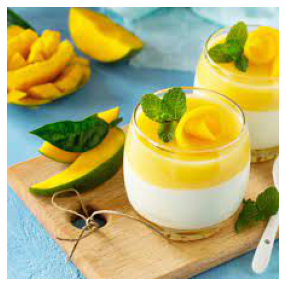

In [21]:
from google.colab import files
uploader = files.upload()

for img in uploader.items():
  uploadedImg = img[0]

img = PILImage.create(uploadedImg)
img.show()

label,_,probs = learn.predict(img)

print(f"This is a {label}.")
print(f"{labelA} {probs[0].item():.2f}")
print(f"{labelB} {probs[1].item():.2f}")
print(f"{labelC} {probs[2].item():.2f}")

Test using images in dataset

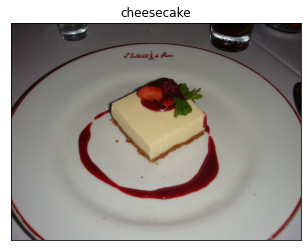

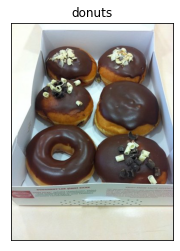

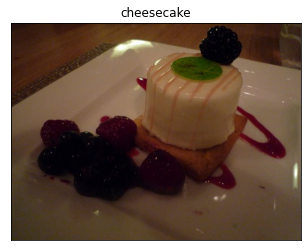

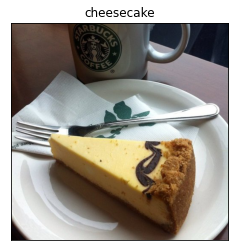

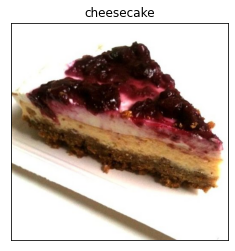

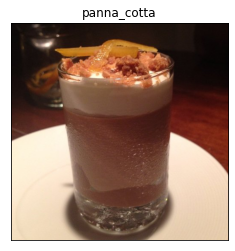

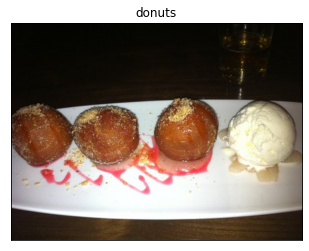

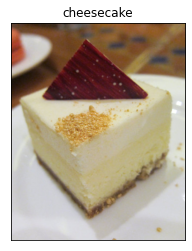

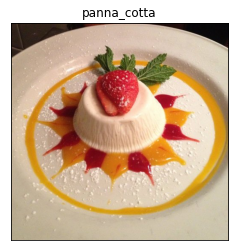

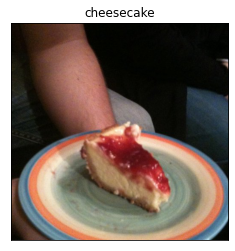

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(0,10):
  #Load random image
  randomIndex = random.randint(0, len(get_image_files(foodPath))-1)
  img = mpimg.imread(get_image_files(foodPath)[randomIndex])
  #Put into Model
  label,_,probs = learn.predict(img)

  #Create Figure using Matplotlib
  fig = plt.figure()
  ax = fig.add_subplot() #Add Subplot (For multiple images)
  imgplot = plt.imshow(img) #Add Image into Plot
  ax.set_title(label) #Set Headline to predicted label

  #Hide numbers on axes
  plt.gca().axes.get_yaxis().set_visible(False)
  plt.gca().axes.get_xaxis().set_visible(False)


Confusion Matrix (optional)

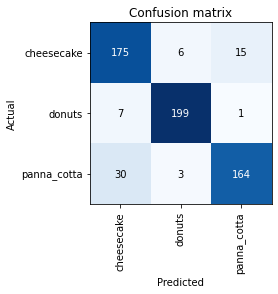

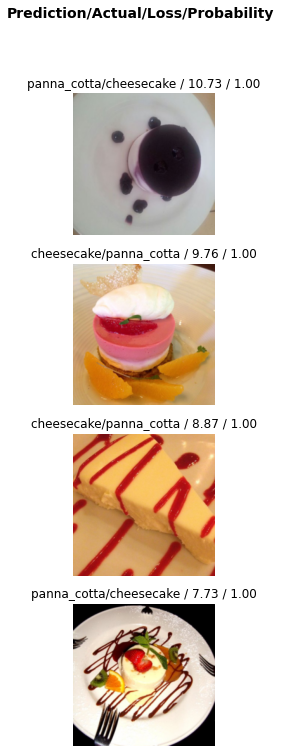

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(4,nrows=4)

Deploy

In [17]:
learn.export() #exports model as 'export.pkl' by default

In [18]:
#let's grab the first pkl file we can find
modelPath = get_files(foodPath, '.pkl')[0]
modelPath

Path('/root/.fastai/data/food-101/export.pkl')

In [19]:
learn_inf = load_learner(modelPath)
learn_inf.predict(mpimg.imread(get_image_files(foodPath)[0])) #raw prediction

('cheesecake', TensorBase(0), TensorBase([9.9999e-01, 2.3137e-10, 1.1468e-05]))